<a href="https://colab.research.google.com/github/jeries-123/AI-project/blob/main/ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Malignant and Benign Cancer Detection**

You have to implement binary classification algorithm. The tasks are given below. Everything must be implemented from scracth using only Python basics (such as loops, functions, and so on) and numpy arrays.

It is forbidden to use any ML libraries.


**Tasks:**

* Implement polynomial features [10p]
* Implement minmax normalisation [10p]
* Implement logistic regression loss function and gradient descent algorithm [10p]
* Plot learning and test curve [10p]
* Generate test prediction (test dataset) [10p]
* Fill the confusion matrix (test dataset) [10p]
* Compute F1 score, precision, recall and accuracy using confusion matrix (test dataset) [10p]
* Try various learning rate and compute F1 score of each learning rate (test dataset) [10p]
* Learning rates: (0.0001, 0.0005, 0.0007, 0.001, 0.005, 0.001, 0.01, 0.05, 0.09, 0.1, 0.4, 0.7) [10p]
* Generate the lists for each learning rate and its associated F1 score and plot (test dataset) [10p]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the data file
df = pd.read_csv('cancer_data.csv')
df.head() # diplay first 5 rows

# remove some of the columns because we don't need
df.drop('Unnamed: 32', inplace = True, axis = 1)
df.drop('id', inplace=True, axis=1)

# target output is a string, replace them to be integer values
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
print(df.head())

print()

# display the columns' title
columns_title=list(df.columns)
print(columns_title)

# convert to numpy
data=df.to_numpy()

# split inputs and output data
data_in=data[:,1:] #input
data_out=data[:,0] #output (m,) vector

# print first 5 rows of outputs
print(data_out[:5])

# reshape data_out to match with the predicted output
data_out = np.reshape(data_out,(-1,1)) # dimension becomes (m,1)

# delete unnecesary variables to save some memory in Colab
del data, df

# display the shape of inputs and outputs
print(f"input dim:{data_in.shape}")
print(f"output dim:{data_out.shape}")

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [ ]:
# split data into training and test sets

ratio = 0.7 # percentage of training dataset

len_tr = int(ratio*len(data_in)) # data_in.shape[0]

# training dataset
tr_data_in = data_in[:len_tr]
tr_data_out = data_out[:len_tr]

# test dataset
test_data_in = data_in[len_tr:]
test_data_out = data_out[len_tr:]

# display the shape of inputs and outputs
print(f"number of train data: {tr_data_in.shape}")
print(f"number of train data: {tr_data_out.shape}")
print(f"number of test data: {test_data_in.shape}")

number of train data: (398, 30)
number of train data: (398, 1)
number of test data: (171, 30)


In [ ]:
#task 1



def add_polyfeatures(data, degree):
    m, n = data.shape


    new_features = []


    for i in range(n):

        for d in range(2, degree + 1):
            new_feature = data[:, i] ** d
            new_features.append(new_feature)


    data_polyfeatures = np.column_stack([data] + new_features)
    return data_polyfeatures

poly_degree = 2

tr_data = add_polyfeatures(tr_data_in, poly_degree)
test_data = add_polyfeatures(test_data_in, poly_degree)


print(f"Number of train data : {tr_data.shape}")
print(f"Number of test data : {test_data.shape}")

Number of train data : (398, 60)
Number of test data : (171, 60)


In [ ]:

# Task 2: Min-Max Normalization

def min_max(data):

    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)

    normalized_data = (data - min_vals) / (max_vals - min_vals)

    return normalized_data


tr_data_poly= min_max(tr_data)
test_data_poly = min_max(test_data)

print("First 5 rows with polynomial features:")
print(tr_data_poly[:5, :])


First 5 rows with polynomial features:
[[0.52103744 0.0226581  0.54598853 0.3640416  0.68000973 0.7920373
  0.70313964 0.73111332 0.66844634 0.60551811 0.35614702 0.12046941
  0.3690336  0.28198282 0.15929565 0.35139844 0.13568182 0.30062512
  0.31164518 0.18304244 0.69246032 0.14152452 0.75012578 0.56480227
  0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396
  0.37077387 0.00929172 0.39156326 0.157671   0.59369992 0.64482493
  0.49440536 0.53452669 0.56977623 0.52857541 0.14397433 0.02906544
  0.15169055 0.08500743 0.03934495 0.13093837 0.01840956 0.09037546
  0.13606841 0.0422117  0.5617597  0.06747473 0.6302494  0.3441715
  0.47754049 0.39537905 0.32331759 0.83179415 0.44984999 0.27750894]
 [0.64314449 0.27257355 0.61578329 0.50201656 0.27047086 0.18176799
  0.20360825 0.34875746 0.34436733 0.14132266 0.15643672 0.08258929
  0.12444047 0.1289653  0.11938675 0.08132304 0.0469697  0.25383595
  0.08453875 0.0911101  0.67698413 0.30357143 0.60590307 0.54539855
  0.347553

In [ ]:
#task 3

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(y_pred, y_true):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient_d(X, y, rate, num):
    m, n = X.shape
    theta0 = np.zeros(n)
    theta1=0

    for iteration in range(num):

         y_pred = sigmoid(np.dot(X, theta0))
         gradient0 = np.sum(np.dot(X.T, (y_pred - y)))
         gradient1 = np.sum (y_pred - y)
         theta0 -= rate * gradient0
         theta1 -= rate * gradient1

        los = loss(y_pred, y)
        print(f"Iteration {iteration + 1}: Loss = {los}")

    return theta0



In [ ]:
#task 4
# Plot the learning and test curves
plt.figure(figsize=(12, 6))
plt.plot(range(max_epoch), tr_data, label="Training Loss")
plt.plot(range(max_epoch), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Curve and Test Curve")
plt.legend()
plt.grid(True)
plt.show()

NameError: ignored

<Figure size 1200x600 with 0 Axes>

In [ ]:
# helper function to plot confusion matrix

def plot_conf_mat(conf_mat):

    class_label=["P","N"]

    plt.subplots(figsize=(8, 8))
    sns.set(font_scale=1.5) # Adjust the font to fit
    sns.heatmap(conf_mat,
                annot=True,
                cbar=False,
                xticklabels=class_label,
                yticklabels=class_label,
                cmap='Blues')

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

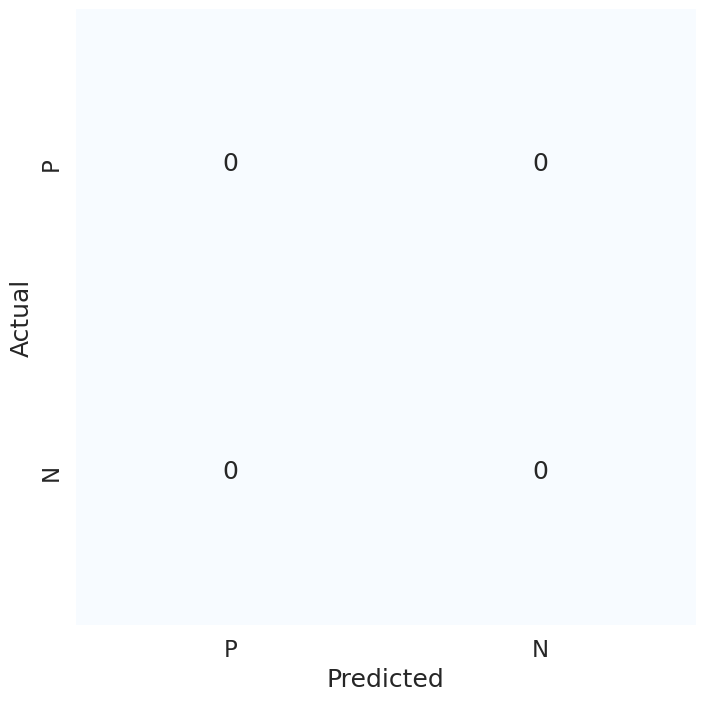

In [ ]:
conf_mat = np.zeros((2,2),dtype=int)
# you need to write algorithm here to update conf_mat
# you have to use test dataset

# plot the confusion matrix
plot_conf_mat(conf_mat)

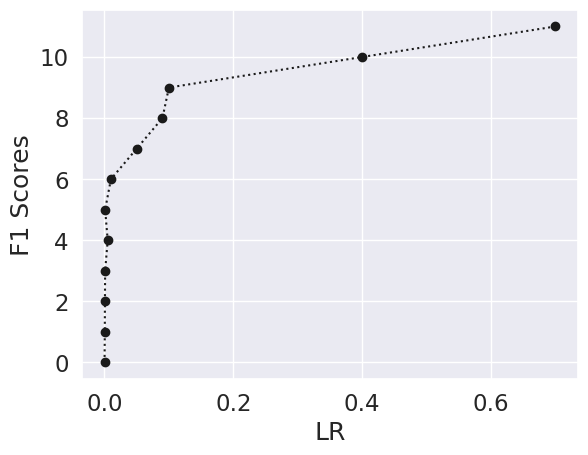

In [ ]:
# test each learning rate and obtained F1 score for each one,
# do experiments one by one and fill the F1 scores manually
# use test dataset

LR = [0.0001, 0.0005, 0.0007, 0.001, 0.005, 0.001, 0.01, 0.05, 0.09, 0.1, 0.4, 0.7]
# you need to update F1_score_list
F1_score_list = [0,1,2,3,4,5,6,7,8,9,10,11]

plt.plot(LR, F1_score_list, 'o:k')
plt.xlabel("LR")
plt.ylabel("F1 Scores")
plt.show()